In [52]:
import pandas as pd
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [53]:
# 清理文本的函數
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # 移除 URL
    text = re.sub(r"@\w+", "", text)    # 移除提及
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # 移除非字母字符
    text = text.lower().strip()  # 小寫化並去除多餘空格
    return text


In [54]:
# 使用 VADER 進行情感分析
def analyze_sentiment_vader(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return "POSITIVE"
    elif score['compound'] <= -0.05:
        return "NEGATIVE"
    else:
        return "NEUTRAL"


In [55]:
# 讀取 CSV 文件
file_path = './src/top_election_posts_2024.csv'
data = pd.read_csv(file_path, encoding='latin1')

# 限制使用前 500 筆數據
data = data.head(500)

# 清理文本
data = data.dropna(subset=['text'])
data['cleaned_text'] = data['text'].apply(clean_text)
data = data[data['cleaned_text'].str.strip().str.len() > 5]


In [56]:
# 初始化 VADER 分析器
analyzer = SentimentIntensityAnalyzer()

# 添加情感分析列
data['sentiment'] = data['cleaned_text'].apply(analyze_sentiment_vader)


In [57]:
# 計算情感分佈
sentiment_counts = data['sentiment'].value_counts(normalize=True)
print("Sentiment Distribution:")
print(sentiment_counts)

# 如果想要在 Jupyter 中展示數據框
data.head()


Sentiment Distribution:
sentiment
POSITIVE    0.630522
NEGATIVE    0.333333
NEUTRAL     0.036145
Name: proportion, dtype: float64


,subreddit,id,title,text,author,created_at,upvotes,num_comments,url,permalink,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,cleaned_text,sentiment
0,PoliticalDiscussion,1gksts4,Why did Kamala Harris lose the election?,Pennsylvania has just been called. This was th...,hearsdemons,2024/11/6 15:17,2106,4815,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pennsylvania has just been called this was the...,POSITIVE
1,PoliticalDiscussion,1ef5frf,Harris's campaign has a different campaign str...,It seems like Harris has given up on trying to...,No-Touch-2570,2024/7/30 01:30,1839,1009,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,it seems like harris has given up on trying to...,POSITIVE
4,PoliticalDiscussion,1gi79lt,Republican Senate leader Mitch McConnell ackno...,Link to his words on it: * https://x.com/harri...,Spiderwig144,2024/11/3 05:44,1524,306,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,link to his words on it and heres a link to ...,NEGATIVE
5,PoliticalDiscussion,18mg5pb,The Colorado Supreme Court on Tuesday said Don...,Colorado Supreme Court rules Trump disqualifie...,jojlo,2023/12/20 07:45,1492,1294,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,colorado supreme court rules trump disqualifie...,POSITIVE
6,PoliticalDiscussion,1bkq6ra,"With Lara Trump now running the RNC, rules wer...","With Lara Trump in place by her Father, rules ...",Deleted,2024/3/22 11:48,1382,407,https://www.reddit.com/r/PoliticalDiscussion/c...,https://reddit.com/r/PoliticalDiscussion/comme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,with lara trump in place by her father rules h...,POSITIVE


## 情感分析可視化 ##
**分析**
- POSITIVE    0.61
- NEGATIVE    0.34
- NEUTRAL     0.04
- 貼文大多愛恨分明，正面居多，目前面臨的問題是一篇貼文內可能包含多位候選人的名字，要進行關鍵字分類和情感分析的話，精準度可能待加強。

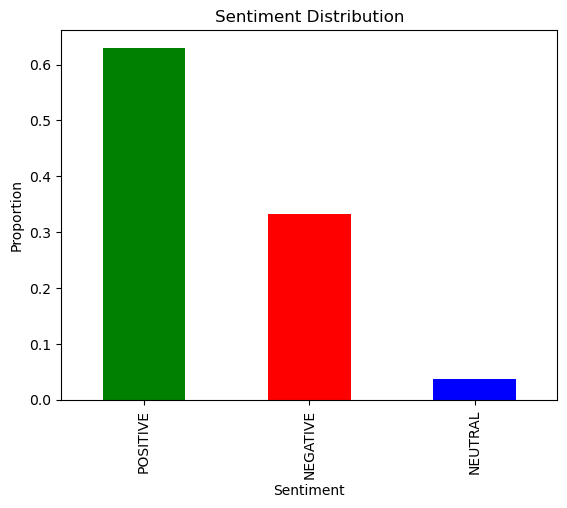

In [58]:
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Proportion")
plt.show()


## 進行關鍵字分析 ##

In [59]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# 定義停用詞
stop_words = set(stopwords.words('english'))

# 清理文本並移除停用詞
def clean_text_for_keywords(text):
    tokens = word_tokenize(text.lower())  # 分詞並轉小寫
    tokens = [word for word in tokens if word.isalpha()]  # 保留字母
    tokens = [word for word in tokens if word not in stop_words]  # 移除停用詞
    return tokens

# 對清理後的文本應用該函數
data['keywords'] = data['cleaned_text'].apply(clean_text_for_keywords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maurice\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maurice\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [60]:
from collections import Counter 

# 展平成單個關鍵詞列表
all_keywords = [keyword for keywords_list in data['keywords'] for keyword in keywords_list]

# 統計詞頻
word_freq = Counter(all_keywords)

# 提取前 20 個熱門關鍵詞
top_keywords = word_freq.most_common(20)

print("Top Keywords:")
print(top_keywords)

Top Keywords:
[('trump', 822), ('would', 352), ('election', 297), ('biden', 281), ('harris', 278), ('president', 207), ('like', 188), ('party', 188), ('republican', 187), ('states', 185), ('could', 183), ('republicans', 175), ('think', 173), ('voters', 168), ('people', 156), ('us', 151), ('democrats', 149), ('trumps', 143), ('also', 142), ('even', 140)]


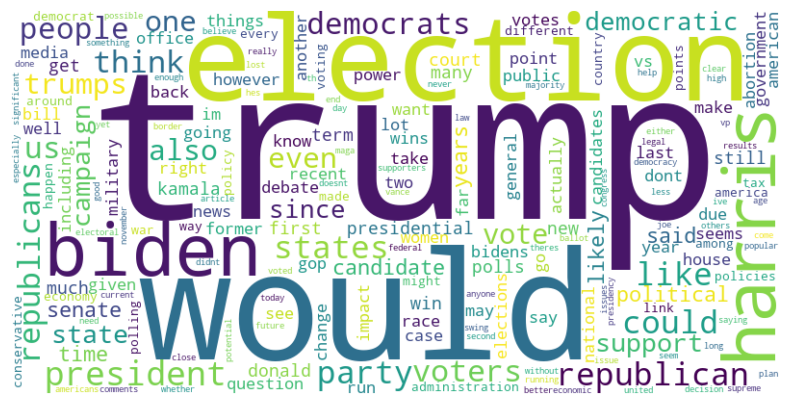

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 生成詞雲
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# 顯示詞雲
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 關鍵字分析結果 ###
- 以上為詞雲分析的結果，關鍵字不外乎就是兩位總統候選人的名字，還有Biden，如果要進行關鍵字分類可以此為基礎。

## 進行貼文主要議題分析 ## 

In [62]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# 將分詞結果轉換回字符串
data['cleaned_text_str'] = data['cleaned_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# 檢查 cleaned_text 欄位的類型
print(data['cleaned_text_str'].head())
print(data['cleaned_text_str'].apply(type).value_counts())

# 使用 TF-IDF 向量化
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text_str'])

# 查看特徵名稱
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Feature names:", feature_names[:10])  # 顯示前10個特徵詞


0    pennsylvania has just been called this was the...
1    it seems like harris has given up on trying to...
4    link to his words on it   and heres a link to ...
5    colorado supreme court rules trump disqualifie...
6    with lara trump in place by her father rules h...
Name: cleaned_text_str, dtype: object
cleaned_text_str
<class 'str'>    498
Name: count, dtype: int64
Feature names: ['abandoned' 'abc' 'ability' 'able' 'abolishing' 'abortion' 'abortions'
 'abroad' 'absent' 'absolute']


In [63]:
from sklearn.decomposition import LatentDirichletAllocation

# 設置主題數量
n_topics = 5
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(tfidf_matrix)

# 顯示每個主題的關鍵詞
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# 查看每個主題的前10個關鍵詞
display_topics(lda_model, feature_names, 10)


Topic 0:
biden trump think president harris election debate voting lot does
Topic 1:
trump harris biden party election think democratic campaign kamala debate
Topic 2:
trump biden president election people like court case make trumps
Topic 3:
trump harris states voters republicans election party like biden republican
Topic 4:
trump election party republican republicans donald democrats senate like vote


In [64]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from pyLDAvis import display

# 使用 pyLDAvis 構建可視化
lda_vis = pyLDAvis.prepare(
    topic_term_dists=lda_model.components_,
    doc_topic_dists=lda_model.transform(tfidf_matrix),
    doc_lengths=[len(doc) for doc in data['cleaned_text']],
    vocab=tfidf_vectorizer.get_feature_names_out(),
    term_frequency=tfidf_matrix.sum(axis=0).A1
)

# 顯示可視化
pyLDAvis.display(lda_vis)



In [65]:
# 為每篇貼文分配主題
data['topic'] = lda_model.transform(tfidf_matrix).argmax(axis=1)

# 檢查主題分布
topic_counts = data['topic'].value_counts()
print("Topic distribution:")
print(topic_counts)


Topic distribution:
topic
3    184
2    117
1     91
0     59
4     47
Name: count, dtype: int64


In [66]:
# 分組計算每個主題的情感分布
topic_sentiment = data.groupby('topic')['sentiment'].value_counts(normalize=True).unstack()
print("Sentiment distribution by topic:")
print(topic_sentiment)


Sentiment distribution by topic:
sentiment  NEGATIVE   NEUTRAL  POSITIVE
topic                                  
0          0.338983  0.050847  0.610169
1          0.241758  0.043956  0.714286
2          0.435897  0.017094  0.547009
3          0.293478  0.038043  0.668478
4          0.404255  0.042553  0.553191


## 進行時間序列性分析 ##

In [67]:
import pandas as pd

# 確保日期轉換的格式正確
try:
    data['created_at'] = pd.to_datetime(data['created_at'], format='%Y/%m/%d %H:%M', errors='coerce')
except Exception as e:
    print(f"Error during datetime conversion: {e}")

# 檢查無效日期並過濾
invalid_dates = data[data['created_at'].isna()]
if not invalid_dates.empty:
    print("Found invalid dates:")
    print(invalid_dates.head())
data = data.dropna(subset=['created_at'])

# 確認過濾後數據的基本信息
print(f"Filtered data: {len(data)} rows")

# 確保按周分組的格式
try:
    data['week'] = data['created_at'].dt.to_period('W').astype(str)
except Exception as e:
    print(f"Error during week grouping: {e}")

# 查看分組後的基本分布
print(data['week'].value_counts().head())



Found invalid dates:
               subreddit       id  \
33   PoliticalDiscussion  1bdqmio   
349  PoliticalDiscussion  1gsuqox   

                                                 title  \
33   ?Too many Republican leaders are lying to Ame...   
349  According to the democracy index, the United S...   

                                                  text  \
33    but to my knowledge Buck is the first to volu...   
349  https://www.democracymatrix.com/ranking I incl...   

                                                author created_at  \
33    but I wonder whether this is just the weeding...        NaT   
349                                   2024/11/17 03:20        NaT   

                                               upvotes  \
33    is will become irrelevant if a Trump dictator...   
349                                                260   

                                          num_comments  \
33                                          davida_usa   
349  https://www.r

In [68]:
# 計算每天的情感分布
sentiment_over_time_weekly = data.groupby('week')['sentiment'].value_counts(normalize=True).unstack()

# 填充缺失值
sentiment_over_time_weekly = sentiment_over_time_weekly.fillna(0)

# 查看結果
print(sentiment_over_time_weekly.head())


sentiment              NEGATIVE  NEUTRAL  POSITIVE
week                                              
2023-11-27/2023-12-03      0.00      0.0      1.00
2023-12-04/2023-12-10      0.00      0.0      1.00
2023-12-11/2023-12-17      0.00      0.0      1.00
2023-12-18/2023-12-24      0.75      0.0      0.25
2023-12-25/2023-12-31      0.50      0.0      0.50


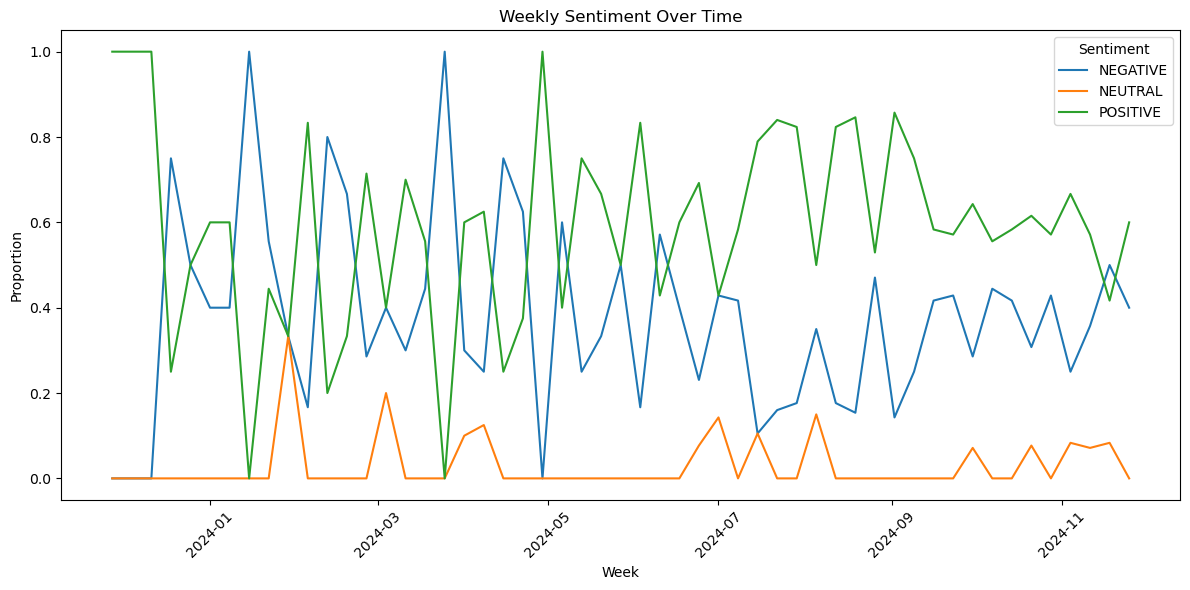

In [69]:
import matplotlib.pyplot as plt

# 提取範圍的開始日期
sentiment_over_time_weekly.index = sentiment_over_time_weekly.index.str.split('/').str[0]

# 將其轉換為標準日期格式
sentiment_over_time_weekly.index = pd.to_datetime(sentiment_over_time_weekly.index, errors='coerce')

plt.figure(figsize=(12, 6))
for sentiment in sentiment_over_time_weekly.columns:
    plt.plot(sentiment_over_time_weekly.index, sentiment_over_time_weekly[sentiment], label=sentiment)

plt.title('Weekly Sentiment Over Time')
plt.xlabel('Week')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


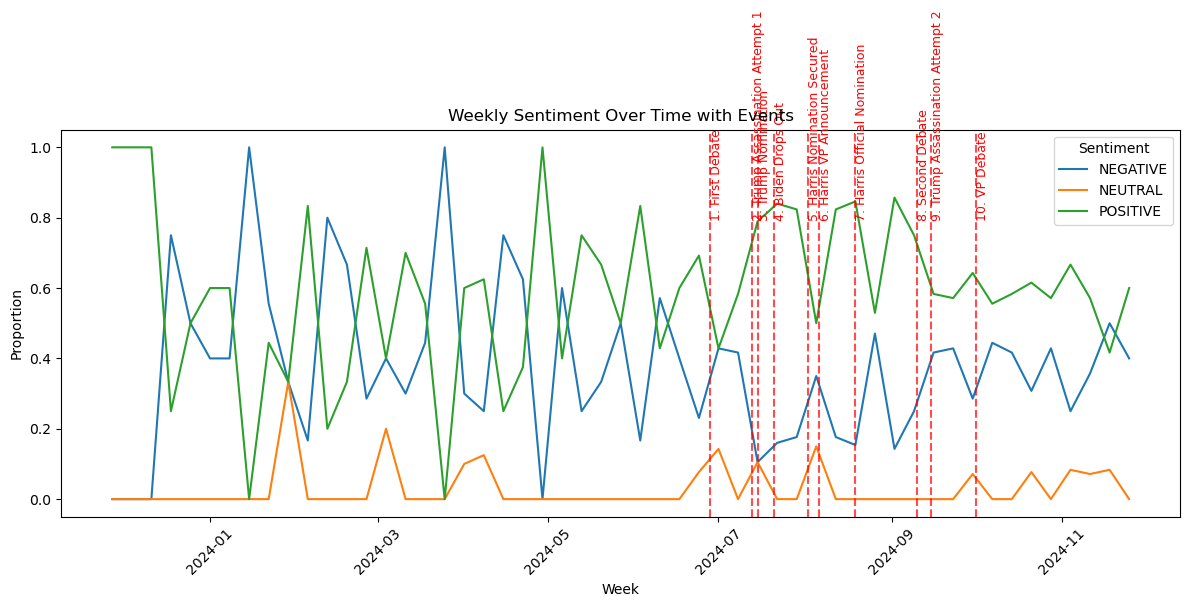

In [70]:
# 事件列表
events = {
    "1. First Debate": "2024-06-28",
    "2. Trump Assassination Attempt 1": "2024-07-13",
    "3. Trump Nomination": "2024-07-15",
    "4. Biden Drops Out": "2024-07-21",
    "5. Harris Nomination Secured": "2024-08-02",
    "6. Harris VP Announcement": "2024-08-06",
    "7. Harris Official Nomination": "2024-08-19",
    "8. Second Debate": "2024-09-10",
    "9. Trump Assassination Attempt 2": "2024-09-15",
    "10. VP Debate": "2024-10-01"
}

# 繪製情感趨勢圖
plt.figure(figsize=(12, 6))
for sentiment in sentiment_over_time_weekly.columns:
    plt.plot(sentiment_over_time_weekly.index, sentiment_over_time_weekly[sentiment], label=sentiment)

# 標記事件
for event_name, event_date in events.items():
    event_date = pd.to_datetime(event_date)
    plt.axvline(event_date, color='red', linestyle='--', alpha=0.7)  # 添加垂直線
    plt.text(event_date, 0.8, event_name, rotation=90, fontsize=9, color='red')  # 添加事件標籤

# 添加圖表標題和圖例
plt.title('Weekly Sentiment Over Time with Events')
plt.xlabel('Week')
plt.ylabel('Proportion')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [71]:
# 定義事件影響範圍（例如 7 天前後）
time_window = pd.Timedelta(days=7)

# 存儲事件前後情感比例
event_impact = {}

for event_name, event_date in events.items():
    event_date = pd.to_datetime(event_date)
    pre_event = sentiment_over_time_weekly.loc[event_date - time_window:event_date]
    post_event = sentiment_over_time_weekly.loc[event_date:event_date + time_window]
    
    # 計算平均情感分布
    event_impact[event_name] = {
        "pre_event": pre_event.mean(),
        "post_event": post_event.mean()
    }

# 查看每個事件前後的情感變化
for event, impact in event_impact.items():
    print(f"Event: {event}")
    print("Pre-event sentiment:", impact["pre_event"])
    print("Post-event sentiment:", impact["post_event"])
    print()


Event: 1. First Debate
Pre-event sentiment: sentiment
NEGATIVE    0.230769
NEUTRAL     0.076923
POSITIVE    0.692308
dtype: float64
Post-event sentiment: sentiment
NEGATIVE    0.428571
NEUTRAL     0.142857
POSITIVE    0.428571
dtype: float64

Event: 2. Trump Assassination Attempt 1
Pre-event sentiment: sentiment
NEGATIVE    0.416667
NEUTRAL     0.000000
POSITIVE    0.583333
dtype: float64
Post-event sentiment: sentiment
NEGATIVE    0.105263
NEUTRAL     0.105263
POSITIVE    0.789474
dtype: float64

Event: 3. Trump Nomination
Pre-event sentiment: sentiment
NEGATIVE    0.260965
NEUTRAL     0.052632
POSITIVE    0.686404
dtype: float64
Post-event sentiment: sentiment
NEGATIVE    0.132632
NEUTRAL     0.052632
POSITIVE    0.814737
dtype: float64

Event: 4. Biden Drops Out
Pre-event sentiment: sentiment
NEGATIVE    0.105263
NEUTRAL     0.105263
POSITIVE    0.789474
dtype: float64
Post-event sentiment: sentiment
NEGATIVE    0.16
NEUTRAL     0.00
POSITIVE    0.84
dtype: float64

Event: 5. Harris

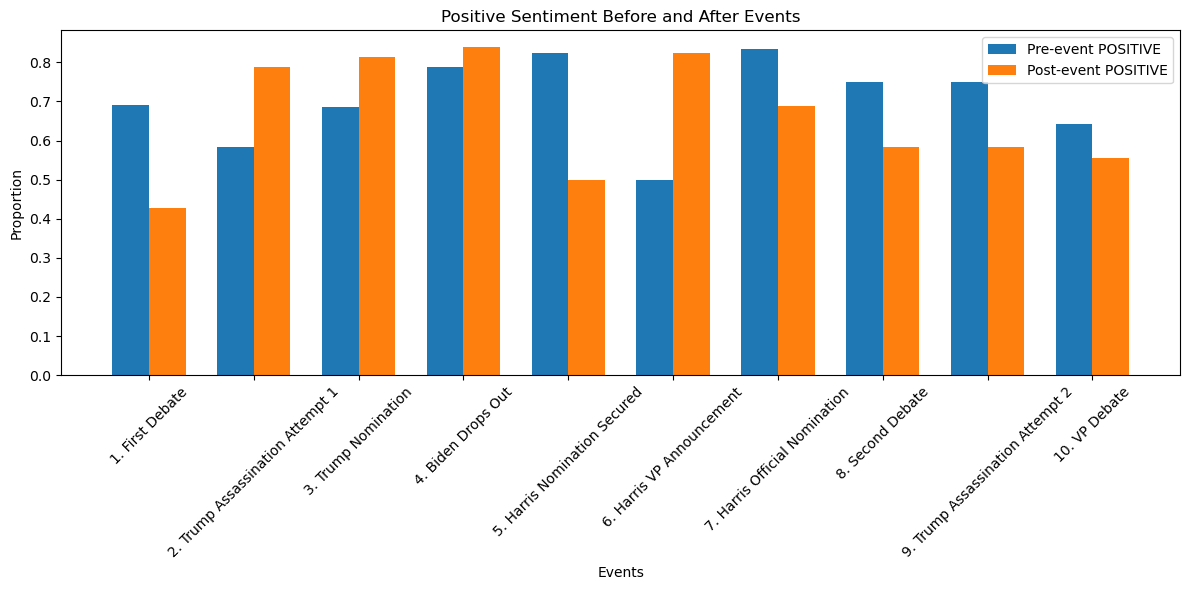

In [72]:
import numpy as np

# 構建條形圖數據
labels = list(event_impact.keys())
pre_event = [impact["pre_event"]["POSITIVE"] for impact in event_impact.values()]
post_event = [impact["post_event"]["POSITIVE"] for impact in event_impact.values()]

# 繪製條形圖
x = np.arange(len(labels))  # 事件索引
width = 0.35  # 條形寬度

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, pre_event, width, label='Pre-event POSITIVE')
ax.bar(x + width/2, post_event, width, label='Post-event POSITIVE')

# 添加標籤和圖例
ax.set_xlabel('Events')
ax.set_ylabel('Proportion')
ax.set_title('Positive Sentiment Before and After Events')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()
